Using TensorFlow backend.


(20000,)
(20000, 3807)
[2 1 0 ... 4 4 4]
[3 0 1 ... 4 4 4]
data_class_2.shape:  (10000, 3807)
data_class_6.shape:  (10000, 3807)
samples_per_class:  10000
samples_count:  20000
all_data.shape :  (20000, 3807)
all_labels.shape :  (20000,)
20000
X_train.shape :  (17000, 3807)
X_test.shape :  (2999, 3807)
Y_train.shape :  (17000,)
Y_test.shape :  (2999,)
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 17000 samples, validate on 2999 samples
Epoch 1/100
17000/17000 [==============================] - 1s 74us/step - loss: 0.5432 - accuracy: 0.7704 - val_loss: 0.2261 - val_accuracy: 0.9246
Epoch 2/100
17000/17000 [==============================] - 1s 56us/step - loss: 0.2767 - accuracy: 0.9016 - val_loss: 0.3929 - val_accuracy: 0.8883
Epoch 3/100
17000/17000 [==============================] - 1s 56us/step - loss: 0.2392 - accuracy: 0.9109 - val_loss: 0.1856 - val_accuracy: 0.9273
Epoch 4/100
17000/17000 [==============================] -

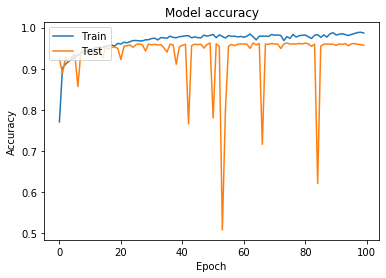

In [1]:
# Z. tritici vs C. globuliformis
%matplotlib inline
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from PIL import Image
import random
import math
import os
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# First import the data by loading the file and extracting the correct section
data_npz = np.load('../../analysis/arrays_test/20171103_FAH15473_b2+b6_seqs.csv.npz')
data = data_npz['arr_0']
labels_npz = np.load('../../analysis/arrays_test/20171103_FAH15473_b2+b6_ids.csv.npz')
labels = labels_npz['arr_0']

# Print the shape of the resulting dataframes to visually verify
print(labels.shape)
print(data.shape)

# Separate the data into separate classes based on the labels
data_class_2 = data[(labels == 2)]
data_class_6 = data[(labels == 6)]
# Print an entry to visualise this
print(data_class_2[50])
print(data_class_6[50])

# Print the shape of these new arrays to visually verify
print('data_class_2.shape: ', data_class_2.shape)
print('data_class_6.shape: ', data_class_6.shape)

# Determine the total number of samples per class, and the total number of samples overall
samples_per_class = data_class_2.shape[0]
samples_count = samples_per_class*2
print('samples_per_class: ', samples_per_class)
print('samples_count: ', samples_count)

# Create a vertically stacked arra containing all sequences, then join labels
all_data = np.vstack((data_class_2, data_class_6))
print('all_data.shape : ', all_data.shape)
all_labels = np.hstack( (np.zeros(samples_per_class), np.ones(samples_per_class)) )
print('all_labels.shape : ', all_labels.shape)

# Create a method for shuffling data
shuffle_indices = random.sample(range(0, samples_count), samples_count)
print(len(shuffle_indices))

# Assign a percentage of data for training and the rest for testing
train_size = math.floor(0.85*all_data.shape[0])
indices_train = shuffle_indices[0:train_size]
indices_test = shuffle_indices[train_size+1:samples_count]

# Define the data vs labels for each of the training ad test sets
X_train = all_data[indices_train,:]
Y_train = all_labels[indices_train]
X_test = all_data[indices_test,:]
Y_test = all_labels[indices_test]
print('X_train.shape : ', X_train.shape)
print('X_test.shape : ', X_test.shape)
print('Y_train.shape : ', Y_train.shape)
print('Y_test.shape : ', Y_test.shape)

# Define the input dimension from X_train.shape[1]
in_dim = X_train.shape[1]

# define the keras model
#model = Sequential()
#model.add(Dense(128, input_dim=480, activation='relu'))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(32, activation='relu'))
#model.add(Dense(2, activation='softmax'))
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=in_dim))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Run the model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=100, epochs=100, verbose=1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

(20000,)
(20000, 3489)
[0 0 2 ... 4 4 4]
[2 1 3 ... 4 4 4]
data_class_2.shape:  (10000, 3489)
data_class_3.shape:  (10000, 3489)
samples_per_class:  10000
samples_count:  20000
all_data.shape :  (20000, 3489)
all_labels.shape :  (20000,)
20000
X_train.shape :  (17000, 3489)
X_test.shape :  (2999, 3489)
Y_train.shape :  (17000,)
Y_test.shape :  (2999,)
Train on 17000 samples, validate on 2999 samples
Epoch 1/100
17000/17000 [==============================] - 1s 59us/step - loss: 0.7744 - accuracy: 0.5016 - val_loss: 0.6975 - val_accuracy: 0.4972
Epoch 2/100
17000/17000 [==============================] - 1s 52us/step - loss: 0.7080 - accuracy: 0.5281 - val_loss: 0.6781 - val_accuracy: 0.5398
Epoch 3/100
17000/17000 [==============================] - 1s 55us/step - loss: 0.6798 - accuracy: 0.6142 - val_loss: 0.6534 - val_accuracy: 0.6212
Epoch 4/100
17000/17000 [==============================] - 1s 53us/step - loss: 0.6293 - accuracy: 0.6664 - val_loss: 1.8173 - val_accuracy: 0.5028
Epoch

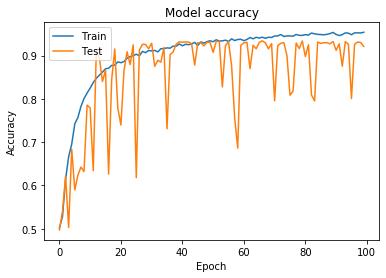

In [2]:
# Z. tritici vs P. tritici-repentis
%matplotlib inline
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from PIL import Image
import random
import math
import os
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# First import the data by loading the file and extracting the correct section
data_npz = np.load('../../analysis/arrays_test/20171103_FAH15473_b2+b3_seqs.csv.npz')
data = data_npz['arr_0']
labels_npz = np.load('../../analysis/arrays_test/20171103_FAH15473_b2+b3_ids.csv.npz')
labels = labels_npz['arr_0']

# Print the shape of the resulting dataframes to visually verify
print(labels.shape)
print(data.shape)

# Separate the data into separate classes based on the labels
data_class_2 = data[(labels == 2)]
data_class_3 = data[(labels == 3)]
# Print an entry to visualise this
print(data_class_2[50])
print(data_class_3[50])

# Print the shape of these new arrays to visually verify
print('data_class_2.shape: ', data_class_2.shape)
print('data_class_3.shape: ', data_class_3.shape)

# Determine the total number of samples per class, and the total number of samples overall
samples_per_class = data_class_2.shape[0]
samples_count = samples_per_class*2
print('samples_per_class: ', samples_per_class)
print('samples_count: ', samples_count)

# Create a vertically stacked arra containing all sequences, then join labels
all_data = np.vstack((data_class_2, data_class_3))
print('all_data.shape : ', all_data.shape)
all_labels = np.hstack( (np.zeros(samples_per_class), np.ones(samples_per_class)) )
print('all_labels.shape : ', all_labels.shape)

# Create a method for shuffling data
shuffle_indices = random.sample(range(0, samples_count), samples_count)
print(len(shuffle_indices))

# Assign a percentage of data for training and the rest for testing
train_size = math.floor(0.85*all_data.shape[0])
indices_train = shuffle_indices[0:train_size]
indices_test = shuffle_indices[train_size+1:samples_count]

# Define the data vs labels for each of the training ad test sets
X_train = all_data[indices_train,:]
Y_train = all_labels[indices_train]
X_test = all_data[indices_test,:]
Y_test = all_labels[indices_test]
print('X_train.shape : ', X_train.shape)
print('X_test.shape : ', X_test.shape)
print('Y_train.shape : ', Y_train.shape)
print('Y_test.shape : ', Y_test.shape)

# Define the input dimension from X_train.shape[1]
in_dim = X_train.shape[1]

# define the keras model
#model = Sequential()
#model.add(Dense(128, input_dim=480, activation='relu'))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(32, activation='relu'))
#model.add(Dense(2, activation='softmax'))
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=in_dim))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Run the model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=100, epochs=100, verbose=1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

(20000,)
(20000, 3505)
[0 3 0 ... 4 4 4]
[0 2 3 ... 4 4 4]
data_class_4.shape:  (10000, 3505)
data_class_5.shape:  (10000, 3505)
samples_per_class:  10000
samples_count:  20000
all_data.shape :  (20000, 3505)
all_labels.shape :  (20000,)
20000
X_train.shape :  (17000, 3505)
X_test.shape :  (2999, 3505)
Y_train.shape :  (17000,)
Y_test.shape :  (2999,)
Train on 17000 samples, validate on 2999 samples
Epoch 1/100
17000/17000 [==============================] - 1s 57us/step - loss: 0.7310 - accuracy: 0.4965 - val_loss: 0.6932 - val_accuracy: 0.4922
Epoch 2/100
17000/17000 [==============================] - 1s 52us/step - loss: 0.6932 - accuracy: 0.5004 - val_loss: 0.6932 - val_accuracy: 0.4922
Epoch 3/100
17000/17000 [==============================] - 1s 51us/step - loss: 0.6932 - accuracy: 0.4999 - val_loss: 0.6932 - val_accuracy: 0.4922
Epoch 4/100
17000/17000 [==============================] - 1s 51us/step - loss: 0.6932 - accuracy: 0.5006 - val_loss: 0.6932 - val_accuracy: 0.4922
Epoch

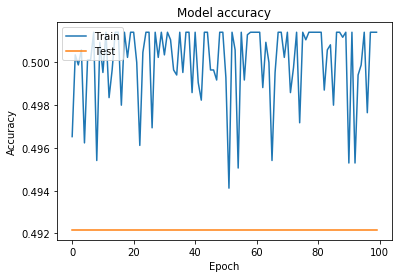

In [3]:
# C. metapsilosis vs C. orthopsilosis
%matplotlib inline
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from PIL import Image
import random
import math
import os
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# First import the data by loading the file and extracting the correct section
data_npz = np.load('../../analysis/arrays_test/20180108_FAH18647_b4+b5_seqs.csv.npz')
data = data_npz['arr_0']
labels_npz = np.load('../../analysis/arrays_test/20180108_FAH18647_b4+b5_ids.csv.npz')
labels = labels_npz['arr_0']

# Print the shape of the resulting dataframes to visually verify
print(labels.shape)
print(data.shape)

# Separate the data into separate classes based on the labels
data_class_4 = data[(labels == 4)]
data_class_5 = data[(labels == 5)]
# Print an entry to visualise this
print(data_class_4[50])
print(data_class_5[50])

# Print the shape of these new arrays to visually verify
print('data_class_4.shape: ', data_class_4.shape)
print('data_class_5.shape: ', data_class_5.shape)

# Determine the total number of samples per class, and the total number of samples overall
samples_per_class = data_class_4.shape[0]
samples_count = samples_per_class*2
print('samples_per_class: ', samples_per_class)
print('samples_count: ', samples_count)

# Create a vertically stacked arra containing all sequences, then join labels
all_data = np.vstack((data_class_4, data_class_5))
print('all_data.shape : ', all_data.shape)
all_labels = np.hstack( (np.zeros(samples_per_class), np.ones(samples_per_class)) )
print('all_labels.shape : ', all_labels.shape)

# Create a method for shuffling data
shuffle_indices = random.sample(range(0, samples_count), samples_count)
print(len(shuffle_indices))

# Assign a percentage of data for training and the rest for testing
train_size = math.floor(0.85*all_data.shape[0])
indices_train = shuffle_indices[0:train_size]
indices_test = shuffle_indices[train_size+1:samples_count]

# Define the data vs labels for each of the training ad test sets
X_train = all_data[indices_train,:]
Y_train = all_labels[indices_train]
X_test = all_data[indices_test,:]
Y_test = all_labels[indices_test]
print('X_train.shape : ', X_train.shape)
print('X_test.shape : ', X_test.shape)
print('Y_train.shape : ', Y_train.shape)
print('Y_test.shape : ', Y_test.shape)

# Define the input dimension from X_train.shape[1]
in_dim = X_train.shape[1]

# define the keras model
#model = Sequential()
#model.add(Dense(128, input_dim=480, activation='relu'))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(32, activation='relu'))
#model.add(Dense(2, activation='softmax'))
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=in_dim))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Run the model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=100, epochs=100, verbose=1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('../../cryptic_4.png')
plt.show()

(20000,)
(20000, 3505)
[1 0 2 ... 0 0 0]
[0 0 0 ... 0 0 0]
data_class_4.shape:  (10000, 3505)
data_class_5.shape:  (10000, 3505)
samples_per_class:  10000
samples_count:  20000
all_data.shape :  (20000, 3505)
all_labels.shape :  (20000,)
20000
X_train.shape :  (17000, 3505)
X_test.shape :  (2999, 3505)
Y_train.shape :  (17000,)
Y_test.shape :  (2999,)
Train on 17000 samples, validate on 2999 samples
Epoch 1/100
17000/17000 [==============================] - 1s 54us/step - loss: 0.9011 - accuracy: 0.5008 - val_loss: 0.7584 - val_accuracy: 0.4978
Epoch 2/100
17000/17000 [==============================] - 1s 49us/step - loss: 0.7040 - accuracy: 0.5071 - val_loss: 0.6955 - val_accuracy: 0.5052
Epoch 3/100
17000/17000 [==============================] - 1s 49us/step - loss: 0.6941 - accuracy: 0.5305 - val_loss: 0.7048 - val_accuracy: 0.5015
Epoch 4/100
17000/17000 [==============================] - 1s 48us/step - loss: 0.6931 - accuracy: 0.5307 - val_loss: 0.6995 - val_accuracy: 0.5015
Epoch

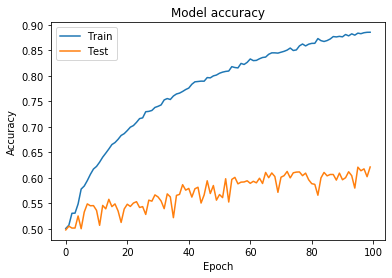

In [4]:
# C. metapsilosis vs C. orthopsilosis
%matplotlib inline
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from PIL import Image
import random
import math
import os
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# First import the data by loading the file and extracting the correct section
data_npz = np.load('../../analysis/arrays_test/20180108_FAH18647_b4+b5_0_seqs.csv.npz')
data = data_npz['arr_0']
labels_npz = np.load('../../analysis/arrays_test/20180108_FAH18647_b4+b5_0_ids.csv.npz')
labels = labels_npz['arr_0']

# Print the shape of the resulting dataframes to visually verify
print(labels.shape)
print(data.shape)

# Separate the data into separate classes based on the labels
data_class_4 = data[(labels == 4)]
data_class_5 = data[(labels == 5)]
# Print an entry to visualise this
print(data_class_4[50])
print(data_class_5[50])

# Print the shape of these new arrays to visually verify
print('data_class_4.shape: ', data_class_4.shape)
print('data_class_5.shape: ', data_class_5.shape)

# Determine the total number of samples per class, and the total number of samples overall
samples_per_class = data_class_4.shape[0]
samples_count = samples_per_class*2
print('samples_per_class: ', samples_per_class)
print('samples_count: ', samples_count)

# Create a vertically stacked arra containing all sequences, then join labels
all_data = np.vstack((data_class_4, data_class_5))
print('all_data.shape : ', all_data.shape)
all_labels = np.hstack( (np.zeros(samples_per_class), np.ones(samples_per_class)) )
print('all_labels.shape : ', all_labels.shape)

# Create a method for shuffling data
shuffle_indices = random.sample(range(0, samples_count), samples_count)
print(len(shuffle_indices))

# Assign a percentage of data for training and the rest for testing
train_size = math.floor(0.85*all_data.shape[0])
indices_train = shuffle_indices[0:train_size]
indices_test = shuffle_indices[train_size+1:samples_count]

# Define the data vs labels for each of the training ad test sets
X_train = all_data[indices_train,:]
Y_train = all_labels[indices_train]
X_test = all_data[indices_test,:]
Y_test = all_labels[indices_test]
print('X_train.shape : ', X_train.shape)
print('X_test.shape : ', X_test.shape)
print('Y_train.shape : ', Y_train.shape)
print('Y_test.shape : ', Y_test.shape)

# Define the input dimension from X_train.shape[1]
in_dim = X_train.shape[1]

# define the keras model
#model = Sequential()
#model.add(Dense(128, input_dim=480, activation='relu'))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(32, activation='relu'))
#model.add(Dense(2, activation='softmax'))
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=in_dim))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Run the model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=100, epochs=100, verbose=1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('../../cryptic_0.png')
plt.show()

(20000,)
(20000, 3505)
[3 4 1 ... 0 0 0]
[2 4 1 ... 0 0 0]
data_class_4.shape:  (10000, 3505)
data_class_5.shape:  (10000, 3505)
samples_per_class:  10000
samples_count:  20000
all_data.shape :  (20000, 3505)
all_labels.shape :  (20000,)
20000
X_train.shape :  (17000, 3505)
X_test.shape :  (2999, 3505)
Y_train.shape :  (17000,)
Y_test.shape :  (2999,)
Train on 17000 samples, validate on 2999 samples
Epoch 1/100
17000/17000 [==============================] - 1s 59us/step - loss: 0.9740 - accuracy: 0.5026 - val_loss: 0.7037 - val_accuracy: 0.5125
Epoch 2/100
17000/17000 [==============================] - 1s 49us/step - loss: 0.7258 - accuracy: 0.5071 - val_loss: 0.6946 - val_accuracy: 0.5122
Epoch 3/100
17000/17000 [==============================] - 1s 49us/step - loss: 0.6967 - accuracy: 0.5051 - val_loss: 0.6934 - val_accuracy: 0.4902
Epoch 4/100
17000/17000 [==============================] - 1s 48us/step - loss: 0.6932 - accuracy: 0.5006 - val_loss: 0.6933 - val_accuracy: 0.4902
Epoch

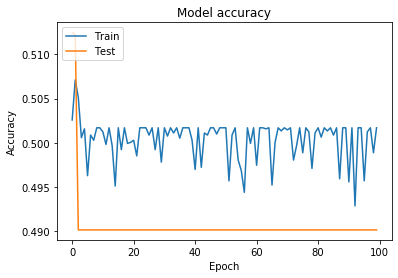

In [5]:
# C. metapsilosis vs C. orthopsilosis
%matplotlib inline
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from PIL import Image
import random
import math
import os
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# First import the data by loading the file and extracting the correct section
data_npz = np.load('../../analysis/arrays_test/20180108_FAH18647_b4+b5_1-4_seqs.csv.npz')
data = data_npz['arr_0']
labels_npz = np.load('../../analysis/arrays_test/20180108_FAH18647_b4+b5_1-4_ids.csv.npz')
labels = labels_npz['arr_0']

# Print the shape of the resulting dataframes to visually verify
print(labels.shape)
print(data.shape)

# Separate the data into separate classes based on the labels
data_class_4 = data[(labels == 4)]
data_class_5 = data[(labels == 5)]
# Print an entry to visualise this
print(data_class_4[50])
print(data_class_5[50])

# Print the shape of these new arrays to visually verify
print('data_class_4.shape: ', data_class_4.shape)
print('data_class_5.shape: ', data_class_5.shape)

# Determine the total number of samples per class, and the total number of samples overall
samples_per_class = data_class_4.shape[0]
samples_count = samples_per_class*2
print('samples_per_class: ', samples_per_class)
print('samples_count: ', samples_count)

# Create a vertically stacked arra containing all sequences, then join labels
all_data = np.vstack((data_class_4, data_class_5))
print('all_data.shape : ', all_data.shape)
all_labels = np.hstack( (np.zeros(samples_per_class), np.ones(samples_per_class)) )
print('all_labels.shape : ', all_labels.shape)

# Create a method for shuffling data
shuffle_indices = random.sample(range(0, samples_count), samples_count)
print(len(shuffle_indices))

# Assign a percentage of data for training and the rest for testing
train_size = math.floor(0.85*all_data.shape[0])
indices_train = shuffle_indices[0:train_size]
indices_test = shuffle_indices[train_size+1:samples_count]

# Define the data vs labels for each of the training ad test sets
X_train = all_data[indices_train,:]
Y_train = all_labels[indices_train]
X_test = all_data[indices_test,:]
Y_test = all_labels[indices_test]
print('X_train.shape : ', X_train.shape)
print('X_test.shape : ', X_test.shape)
print('Y_train.shape : ', Y_train.shape)
print('Y_test.shape : ', Y_test.shape)

# Define the input dimension from X_train.shape[1]
in_dim = X_train.shape[1]

# define the keras model
#model = Sequential()
#model.add(Dense(128, input_dim=480, activation='relu'))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(32, activation='relu'))
#model.add(Dense(2, activation='softmax'))
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=in_dim))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Run the model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=100, epochs=100, verbose=1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('../../cryptic_1-4.png')
plt.show()

(20000,)
(20000, 4352)
[2 1 0 ... 4 4 4]
[0 1 0 ... 4 4 4]
data_class_4.shape:  (10000, 4352)
data_class_3.shape:  (10000, 4352)
samples_per_class:  10000
samples_count:  20000
all_data.shape :  (20000, 4352)
all_labels.shape :  (20000,)
20000
X_train.shape :  (17000, 4352)
X_test.shape :  (2999, 4352)
Y_train.shape :  (17000,)
Y_test.shape :  (2999,)
Train on 17000 samples, validate on 2999 samples
Epoch 1/100
17000/17000 [==============================] - 1s 63us/step - loss: 1.2314 - accuracy: 0.5288 - val_loss: 0.8441 - val_accuracy: 0.5082
Epoch 2/100
17000/17000 [==============================] - 1s 56us/step - loss: 0.7230 - accuracy: 0.5543 - val_loss: 0.6678 - val_accuracy: 0.6189
Epoch 3/100
17000/17000 [==============================] - 1s 57us/step - loss: 0.6922 - accuracy: 0.5706 - val_loss: 0.6425 - val_accuracy: 0.6312
Epoch 4/100
17000/17000 [==============================] - 1s 54us/step - loss: 0.6799 - accuracy: 0.6027 - val_loss: 0.6815 - val_accuracy: 0.5525
Epoch

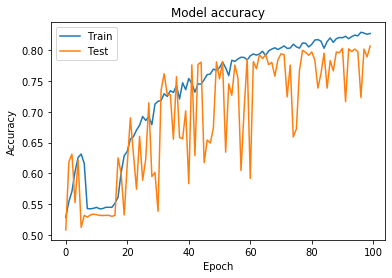

In [6]:
# C. albicans vs C. metapsilosis
%matplotlib inline
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from PIL import Image
import random
import math
import os
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# First import the data by loading the file and extracting the correct section
data_npz = np.load('../../analysis/arrays_test/20180108_FAH18647_b3+b4_seqs.csv.npz')
data = data_npz['arr_0']
labels_npz = np.load('../../analysis/arrays_test/20180108_FAH18647_b3+b4_ids.csv.npz')
labels = labels_npz['arr_0']

# Print the shape of the resulting dataframes to visually verify
print(labels.shape)
print(data.shape)

# Separate the data into separate classes based on the labels
data_class_4 = data[(labels == 4)]
data_class_3 = data[(labels == 3)]
# Print an entry to visualise this
print(data_class_4[50])
print(data_class_3[50])

# Print the shape of these new arrays to visually verify
print('data_class_4.shape: ', data_class_4.shape)
print('data_class_3.shape: ', data_class_3.shape)

# Determine the total number of samples per class, and the total number of samples overall
samples_per_class = data_class_4.shape[0]
samples_count = samples_per_class*2
print('samples_per_class: ', samples_per_class)
print('samples_count: ', samples_count)

# Create a vertically stacked arra containing all sequences, then join labels
all_data = np.vstack((data_class_4, data_class_3))
print('all_data.shape : ', all_data.shape)
all_labels = np.hstack( (np.zeros(samples_per_class), np.ones(samples_per_class)) )
print('all_labels.shape : ', all_labels.shape)

# Create a method for shuffling data
shuffle_indices = random.sample(range(0, samples_count), samples_count)
print(len(shuffle_indices))

# Assign a percentage of data for training and the rest for testing
train_size = math.floor(0.85*all_data.shape[0])
indices_train = shuffle_indices[0:train_size]
indices_test = shuffle_indices[train_size+1:samples_count]

# Define the data vs labels for each of the training ad test sets
X_train = all_data[indices_train,:]
Y_train = all_labels[indices_train]
X_test = all_data[indices_test,:]
Y_test = all_labels[indices_test]
print('X_train.shape : ', X_train.shape)
print('X_test.shape : ', X_test.shape)
print('Y_train.shape : ', Y_train.shape)
print('Y_test.shape : ', Y_test.shape)

# Define the input dimension from X_train.shape[1]
in_dim = X_train.shape[1]

# define the keras model
#model = Sequential()
#model.add(Dense(128, input_dim=480, activation='relu'))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(32, activation='relu'))
#model.add(Dense(2, activation='softmax'))
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=in_dim))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Run the model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=100, epochs=100, verbose=1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

(20000,)
(20000, 3428)
[0 3 3 ... 0 0 0]
[0 0 1 ... 0 0 0]
data_class_7.shape:  (10000, 3428)
data_class_8.shape:  (10000, 3428)
samples_per_class:  10000
samples_count:  20000
all_data.shape :  (20000, 3428)
all_labels.shape :  (20000,)
20000
X_train.shape :  (17000, 3428)
X_test.shape :  (2999, 3428)
Y_train.shape :  (17000,)
Y_test.shape :  (2999,)
Train on 17000 samples, validate on 2999 samples
Epoch 1/100
17000/17000 [==============================] - 1s 57us/step - loss: 0.7545 - accuracy: 0.5209 - val_loss: 0.6848 - val_accuracy: 0.5342
Epoch 2/100
17000/17000 [==============================] - 1s 48us/step - loss: 0.6791 - accuracy: 0.5703 - val_loss: 0.6953 - val_accuracy: 0.5132
Epoch 3/100
17000/17000 [==============================] - 1s 47us/step - loss: 0.6448 - accuracy: 0.6291 - val_loss: 0.6230 - val_accuracy: 0.6809
Epoch 4/100
17000/17000 [==============================] - 1s 49us/step - loss: 0.6147 - accuracy: 0.6682 - val_loss: 0.8773 - val_accuracy: 0.5115
Epoch

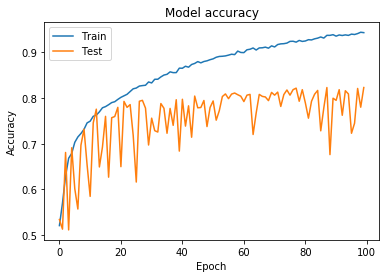

In [7]:
# Y. mexicana vs Y. scolyti
%matplotlib inline
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from PIL import Image
import random
import math
import os
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# First import the data by loading the file and extracting the correct section
data_npz = np.load('../../analysis/arrays_test/20171207_FAH18654_b7+b8_seqs.csv.npz')
data = data_npz['arr_0']
labels_npz = np.load('../../analysis/arrays_test/20171207_FAH18654_b7+b8_ids.csv.npz')
labels = labels_npz['arr_0']

# Print the shape of the resulting dataframes to visually verify
print(labels.shape)
print(data.shape)

# Separate the data into separate classes based on the labels
data_class_7 = data[(labels == 7)]
data_class_8 = data[(labels == 8)]
# Print an entry to visualise this
print(data_class_7[50])
print(data_class_8[50])

# Print the shape of these new arrays to visually verify
print('data_class_7.shape: ', data_class_7.shape)
print('data_class_8.shape: ', data_class_8.shape)

# Determine the total number of samples per class, and the total number of samples overall
samples_per_class = data_class_7.shape[0]
samples_count = samples_per_class*2
print('samples_per_class: ', samples_per_class)
print('samples_count: ', samples_count)

# Create a vertically stacked arra containing all sequences, then join labels
all_data = np.vstack((data_class_7, data_class_8))
print('all_data.shape : ', all_data.shape)
all_labels = np.hstack( (np.zeros(samples_per_class), np.ones(samples_per_class)) )
print('all_labels.shape : ', all_labels.shape)

# Create a method for shuffling data
shuffle_indices = random.sample(range(0, samples_count), samples_count)
print(len(shuffle_indices))

# Assign a percentage of data for training and the rest for testing
train_size = math.floor(0.85*all_data.shape[0])
indices_train = shuffle_indices[0:train_size]
indices_test = shuffle_indices[train_size+1:samples_count]

# Define the data vs labels for each of the training ad test sets
X_train = all_data[indices_train,:]
Y_train = all_labels[indices_train]
X_test = all_data[indices_test,:]
Y_test = all_labels[indices_test]
print('X_train.shape : ', X_train.shape)
print('X_test.shape : ', X_test.shape)
print('Y_train.shape : ', Y_train.shape)
print('Y_test.shape : ', Y_test.shape)

# Define the input dimension from X_train.shape[1]
in_dim = X_train.shape[1]

# define the keras model
#model = Sequential()
#model.add(Dense(128, input_dim=480, activation='relu'))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(32, activation='relu'))
#model.add(Dense(2, activation='softmax'))
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=in_dim))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Run the model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=100, epochs=100, verbose=1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()